# Pokemon Data Exploration
## by Logan Vega


## Investigation Overview

In this investigation, I was most interested in finding out how Pokemon types compare with each other, in areas such as more/less common, more/less powerful, and legendary/mythical status. I was also interested in finding any predictors of pokemon battle stat values.

## Dataset Overview

The data consists of information regarding all 807 Pokemon from the first 7 generations, including Pokemon type, battle statistics, evolution information, and if a Pokemon is a rare and special "legendary" or "mythical" Pokemon.

## Background

- Battle statistics (hp, attack, defense, special attack, and special defense, and speed) determine how powerful a Pokemon is in battle.
    - Total stats is the summation of these individual stats and is used as a single metric the describe Pokemon strength.
- Evolution is when a pokemon of a certain species permanently evolves into another species. Not all Pokemon do this. 
- Pokemon type is a metric that determines what moves a Pokemon can use and how effective certain moves are against that Pokemon.
- Legendary and mythical Pokemon are special Pokemon that are exceedingly rare.
- Capture rate determines how easy it is to capture the Pokemon (the higher the value, the easier it is to catch).
- Generation is the iteration where the Pokemon was introduced. There are 7 generations in this dataset.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [3]:
# load dataset into df
df = pd.read_csv('pokemon_data.csv')

In [4]:
# combine type_1 and type_2 columns in separate df to use when comparing types as a whole
types_df = df.melt(id_vars= ['id', 'species'], value_vars= ['type_1', 'type_2'], var_name= 'type_tier', value_name= 'type').dropna()

## Distribution of Pokemon Types

Water is the most common type and ice is the least common. There are about 4 times as many water types as ice types.

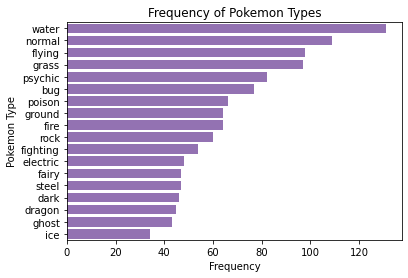

In [8]:
# plot ordered countplot of types
order = types_df['type'].value_counts().index
std_color = sb.color_palette()[4]
sb.countplot(data= types_df, y= 'type', color= std_color, order= order)
plt.title('Frequency of Pokemon Types')
plt.xlabel('Frequency')
plt.ylabel('Pokemon Type');

In [13]:
df['total_stats'] = df['hp'] + df['attack'] + df['special-attack'] + df['defense'] + df['special-defense'] + df['speed']

## Distribution of Pokemon Total Stats

The distribution is bimodal with peaks around 300 and 500 total battle stats. There is a small and seperated group of Pokemon near 700 total stats as well, meaning they are much stronger than the rest of the Pokemon.

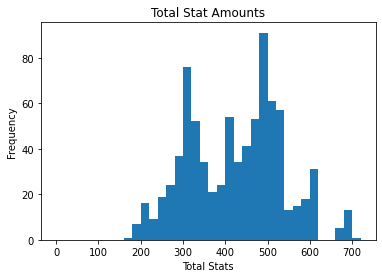

In [15]:
# plot histogram of stat totals
bins = np.arange(0,df['total_stats'].max()+20, 20)
plt.hist(data= df, x= 'total_stats', bins= bins)
plt.xlabel('Total Stats')
plt.ylabel('Frequency')
plt.title('Total Stat Amounts');

In [16]:
# make new column to categorize: legendary, mythical, and neither
def leg_myth(row):
    if row['is_legendary']:
        status = 'Legendary'
    elif row['is_mythical']:
        status = 'Mythical'
    else:
        status = 'Neither'
    return status

df['legendary_or_mythical'] = df.apply(leg_myth, axis=1)

In [17]:
# add new column is_evolved that says if a pokemon is evolved or not
def is_evolved(row):
    if row['evolves_from_species_id'] > 0:
        evolved = 1
    else:
        evolved = 0
    return evolved

df['is_evolved'] = df.apply(is_evolved, axis= 1)

In [18]:
# melt type_1 and type_2 columns into 1 (while keeping all other columns) to create separate df to be used in
# type comparisons
id_vars = ['id', 'species', 'generation_id', 'hp', 'attack', 'special-attack', 'defense', 'special-defense', 'speed', 
           'total_stats', 'capture_rate', 'is_legendary', 'is_mythical', 'is_evolved', 'legendary_or_mythical']
types_df = df.melt(id_vars= id_vars, value_vars= ['type_1', 'type_2'], var_name= 'type_tier', value_name= 'type').dropna()

## Pokemon Type vs. Total Stats and vs. Capture Rate

Dragon and steel types have slightly higher total stats than other Pokemon types. Water types, the most popular, have a large range of total stats. Capture rates have very similar lower quartiles, but the fire, fighting, rock, and dragon types have significantly lower upper quartiles, meaning these types do not have as many easy to catch Pokemon as the other types. The steel type is the only type with a noticeably smaller lower quartile.

<Figure size 720x720 with 0 Axes>

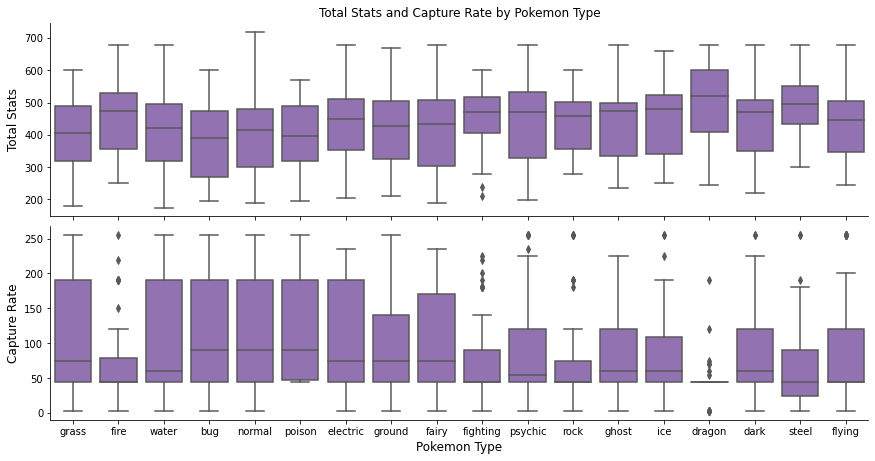

In [32]:
# box plots for total stats and capture rate vs Pokemon type
def boxgrid(x, y, **kwargs):
    std_color = sb.color_palette()[4]
    sb.boxplot(x, y, color= std_color)


plt.figure(figsize= [10, 10])
plots = sb.PairGrid(data= types_df, y_vars= ['total_stats', 'capture_rate'], x_vars= 'type', height= 3, aspect= 4)
plots.map(boxgrid)
plots.axes[0][0].set_ylabel('Total Stats', size= 'large')
plt.xlabel('Pokemon Type', size= 'large')
plt.ylabel('Capture Rate', size= 'large')
plots.axes[0][0].set_title('Total Stats and Capture Rate by Pokemon Type')
plt.show();

## Total Stats by Pokemon Type and Legendary/Mythical Status

The strongest Pokemon are legendaries from the ghost, dark, dragon, and normal types. There are no legendary or mythical posion-type Pokemon. Interestingly, the types with higher total stats for normal (not legendary/mythical) Pokemon are not the types that have the strongest legendary/mythical Pokemon, with the exception of the dragon type. In fact, the normal type ranks low in total stats for normal Pokemon, but very high in total stats for both legendary and mythical Pokemon. This suggests that the strength of normal Pokemon of a certain type is not a predictor of the strength of that type's legendary and mythical Pokemon.

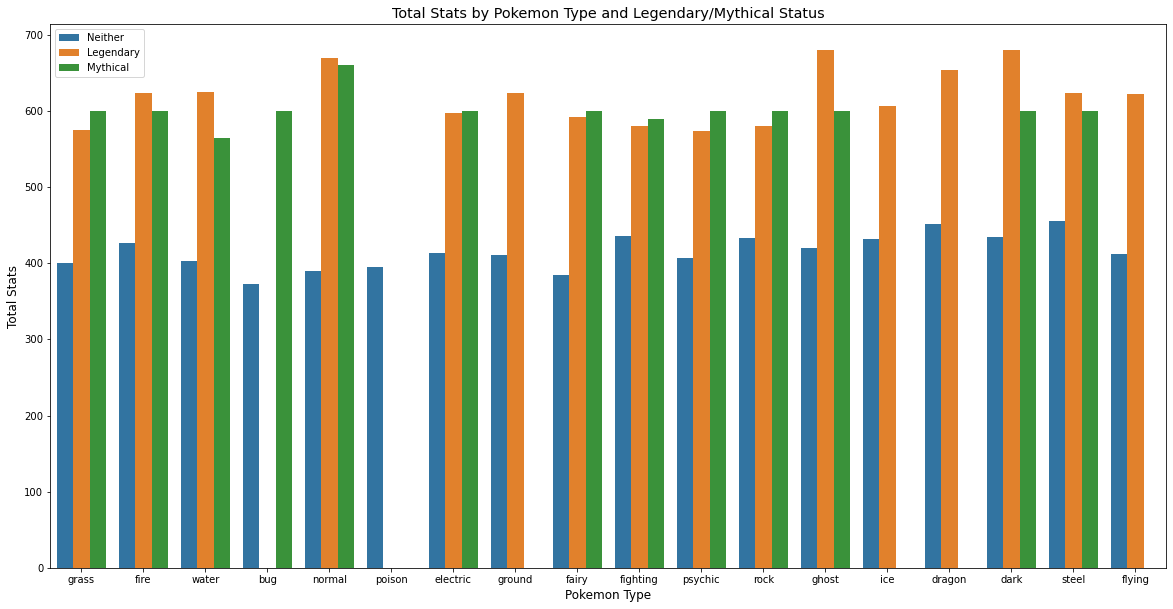

In [36]:
# plot triple bar graph for legendary/mythical status for each type versus total stats
plt.figure(figsize= [20, 10])
g = sb.barplot(data= types_df, x= 'type', y= 'total_stats', hue= 'legendary_or_mythical', ci= None)
plt.xlabel('Pokemon Type', size= 'large')
plt.ylabel('Total Stats', size= 'large')
plt.title('Total Stats by Pokemon Type and Legendary/Mythical Status', size= 'x-large')
handles, labels = g.get_legend_handles_labels()
g.legend(handles, labels);

## Total Stats vs. Generation and Evolution

Generation 1 has the largest gap between evolved and nonevolved Pokemon in terms of total stats, and generation 7 the smallest gap. This suggests that for generation 1, picking Pokemon that evolve to use in your team is likely more important for battle strength than it is in generation 7. <br/> Generation 4 has the highest average total level for evolved Pokemon. Generation 7 has the 2nd highest for evolved Pokemon and the highest for nonevolved Pokemon. This suggests that generation 7 has a higher proportion of Pokemon with higher total stats than other generations. 

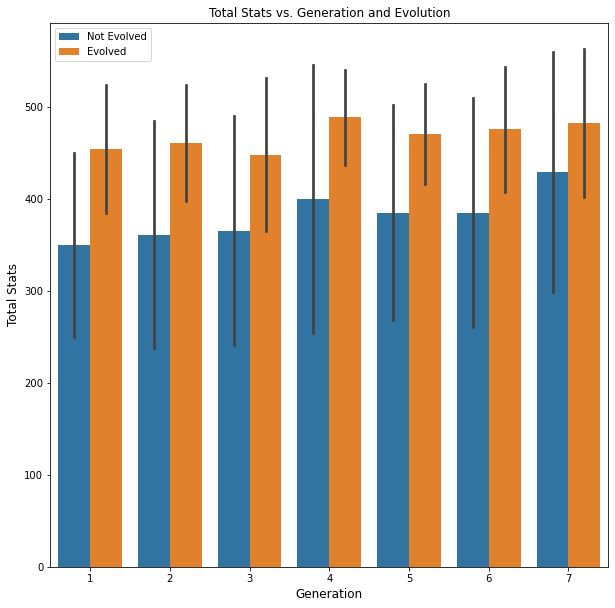

In [33]:
# plot double bar graph for evolved and not evolved pokemon in each generation versus total stats
plt.figure(figsize= [10, 10])
g = sb.barplot(data= df, x= 'generation_id', y= 'total_stats', hue= 'is_evolved', ci= 'sd')
plt.xlabel('Generation', size= 'large')
plt.ylabel('Total Stats', size= 'large')
plt.title('Total Stats vs. Generation and Evolution')
handles, labels = g.get_legend_handles_labels()
g.legend(handles, ('Not Evolved', 'Evolved'));